In [76]:
# Lecture 1

from sklearn.model_selection import train_test_split 
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.datasets import load_digits
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVC, SVR, LinearSVC
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

# Lecture 2
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF, DotProduct
from sklearn.datasets import make_blobs, make_regression, make_circles
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

# Lecture 3
# Feature selection
from sklearn.feature_selection import RFE, RFECV

# data
from sklearn.datasets import make_friedman1

# Other
import numpy as np
import pandas as pd
import pickle 
import numpy.random as npr
import numpy.linalg as npla
from scipy.optimize import minimize


from sklearn import datasets
from sklearn.datasets import make_hastie_10_2
from sklearn.datasets import load_boston
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer

# pip install git+git://github.com/mgelbart/plot-classifier.git
from plot_classifier import plot_classifier

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import pandas as pd
pd.set_option("display.max_colwidth", 200)

import altair as alt
import time

# pip install ipython-autotime
import autotime

In [77]:
# fit and report function

def fit_and_report(model, X, y, Xv, yv, mode = 'regression'):
    """
    WRITE YOUR DOCSTRING HERE. 
    """
    model.fit(X, y)
    if mode.lower().startswith('regress'):
        errors = [mean_squared_error(y, model.predict(X)), mean_squared_error(yv, model.predict(Xv))]
    if mode.lower().startswith('classif'):
        errors = [1 - model.score(X,y), 1 - model.score(Xv,yv)]        
    return errors

In [78]:
df = pd.read_csv("data/winequality-red.csv")

In [79]:
# Create train/test splits
X = (df.drop(columns = ['quality'])).to_numpy()
y = (df['quality']).to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 111)

In [80]:
lr = LinearRegression(normalize=True)
errors = fit_and_report(lr, X_train, y_train, X_test, y_test)
print('Train error %0.3f'%(errors[0]))
print('Test error %0.3f'%(errors[1]))

results = {'model':[], 'train error':[], 'test error':[]}
results['model'].append('Linear Regression (all feats)')
results['train error'].append(errors[0])
results['test error'].append(errors[1])

Train error 0.418
Test error 0.413


In [81]:
error_train =[]
error_valid =[]

for i in range(1,12):
    lr = LinearRegression(normalize=True)
    rfe = RFE(estimator = lr, n_features_to_select = i)
    rfe.fit(X_train, y_train)
    
    X_train_sel = X_train[:, rfe.support_]
    X_test_sel = X_test[:, rfe.support_]
    
    errors = fit_and_report(SVR(), X_train_sel, y_train, X_test_sel, y_test)
    error_train.append(errors[0])
    error_valid.append(errors[1])

Text(0.5,1,'The mean squared error with different number of features')

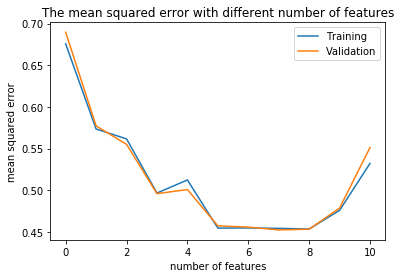

In [82]:
plt.plot(error_train, label="Training")
plt.plot(error_valid, label="Validation")
plt.legend()
plt.xlabel('number of features')
plt.ylabel('mean squared error')
plt.title('The mean squared error with different number of features')

In [83]:
## fit the model with number of features= 5

lr = LinearRegression(normalize=True)
rfe = RFE(estimator = lr, n_features_to_select = 5)
rfe.fit(X_train, y_train)

# How to access the selected features
print(rfe.support_)

# How to access the feature ranking
print(rfe.ranking_)

[False  True False False  True False False  True  True  True False]
[4 1 3 5 1 6 7 1 1 1 2]


In [84]:
## export the new train and test data
## Hanying !!!
### Let's examine the train and test errors on the selected features
X_train_sel = X_train[:, rfe.support_]
X_test_sel = X_test[:, rfe.support_]
lr = LinearRegression(normalize=True)

errors = fit_and_report(lr, X_train_sel, y_train, X_test_sel, y_test)
print('Train error %0.3f'%(errors[0]))
print('Test error %0.3f'%(errors[1]))

results['model'].append('Linear Regression (RFE)')
results['train error'].append(errors[0])
results['test error'].append(errors[1])

Train error 0.499
Test error 0.481


In [85]:
df = pd.DataFrame(results)
df

,model,train error,test error
0,Linear Regression (all feats),0.418107,0.412690
1,Linear Regression (RFE),0.499245,0.481289
